## Goal of this Notebook
1. Find the conditional probability of a movement given the previous day's movement
2. Repeat with the other stocks and find the average movement given the previous day
3. Create a few visuals (bar charts)

For the simple strategies, let's do all possible "observe one day, predict the second day" scenarios.

For example:  
big drop, ?  
small gain, ?  
big gain, ?  
...  

The returned value should be a probability distribution of the different categories

## Note:
This notebook is a mess. I implemented things that could be done in one line with the proper function, but this is the best I could come up with without having internet right now. Also the variable names and notebook comments are bad.

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('tsla.csv')
daily_movements = get_price_movements(df)

In [3]:
np.mean(daily_movements)

0.20161638055757572

In [5]:
def categorize_movements(movements):
    """Given an array of movements, return an array of categories based on how relatively large the movements are"""
    mu, sigma = np.mean(movements), np.std(movements)
    categories = []
    
    for i in range(len(movements)):
        if (movements[i] <= (mu - 2*sigma)):
            categories.append('vbd') ## very big drop
        elif (movements[i] <= (mu - sigma)):
            categories.append('bd')  ## big drop
        elif (movements[i] <= (mu - sigma/2)):
            categories.append('md')  ## medium drop
        elif (movements[i] < mu):
            categories.append('sd')  ## small drop
        elif (movements[i] >= (mu + 2*sigma)):
            categories.append('vbg') ## very big gain
        elif (movements[i] >= (mu + sigma)):
            categories.append('bg')  ## big gain
        elif (movements[i] >= (mu + sigma/2)):
            categories.append('mg')  ## medium gain
        elif (movements[i] >= mu):
            categories.append('sg')  ## small gain
        else:
            print("didn't fit")
    
    return categories
        

In [6]:
def count_movement_category(categories, cat_to_count):
    count = 0
    for i in range(len(categories)):
        if categories[i] == cat_to_count:
            count = count + 1
    return count

In [7]:
def count_trends(trends, trend_to_count):
    count = 0
    for i in range(len(trends)):
        if trends[i] == trend_to_count:
            count = count + 1
    return count

In [8]:
categories = categorize_movements(daily_movements)

#### First let's try looking ahead only one timestep
We can add a period variable later on to generalize.

In [9]:
vbd_count = count_movement_category(categories, 'vbd')
bd_count = count_movement_category(categories, 'bd')
md_count = count_movement_category(categories, 'md')
sd_count = count_movement_category(categories, 'sd')
sg_count = count_movement_category(categories, 'sg')
mg_count = count_movement_category(categories, 'mg')
bg_count = count_movement_category(categories, 'bg')
vbg_count = count_movement_category(categories, 'vbg')
total_cat_count = len(categories)

In [10]:
p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

In [12]:
cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

In [13]:
[print(i) for i in cat_probs]

0.021630615640599003
0.09095951192457016
0.13422074320576816
0.2723239046034387
0.23183582917359954
0.14697726012201887
0.0776483638380477
0.021630615640599003


[None, None, None, None, None, None, None, None]

In [14]:
cat_probs

[0.021630615640599003,
 0.09095951192457016,
 0.13422074320576816,
 0.2723239046034387,
 0.23183582917359954,
 0.14697726012201887,
 0.0776483638380477,
 0.021630615640599003]

In [15]:
def get_two_day_trends(categories):
	two_day_trends = []
	for i in range(len(categories) - 1):
		two_day_trends.append(categories[i] + '_' + categories[i+1])
	return two_day_trends

How can we tell if this has any predictive value? If having information of what happened the previous day can help us better predict what will happen tomorrow.  
Foramlly, if P(category | previous category) != P(category)

We can use Bayes rule later to see the probability of the next day given an observed event

In [16]:
two_day_trends = get_two_day_trends(categories)

In [17]:
two_day_trends[1:10]

['vbd_vbd',
 'vbd_vbd',
 'vbd_md',
 'md_vbg',
 'vbg_sd',
 'sd_md',
 'md_bg',
 'bg_vbg',
 'vbg_sg']

In [18]:
## Lets say a 'g' was observed today. What is the augmented probability of all events tomorrow?
## Formally, we want P(X2=x|X1='g'), which is P(X1='g' AND X2=x) / P(X1='g')
mg_vbd_count = count_two_day_trends(two_day_trends, 'mg_vbd')
mg_bd_count = count_two_day_trends(two_day_trends, 'mg_bd')
mg_md_count = count_two_day_trends(two_day_trends, 'mg_md')
mg_sd_count = count_two_day_trends(two_day_trends, 'mg_sd')
mg_sg_count = count_two_day_trends(two_day_trends, 'mg_sg')
mg_mg_count = count_two_day_trends(two_day_trends, 'mg_mg')
mg_bg_count = count_two_day_trends(two_day_trends, 'mg_bg')
mg_vbg_count = count_two_day_trends(two_day_trends, 'mg_vbg')

p_mg_vbd = mg_vbd_count / mg_count
p_mg_bd = mg_bd_count / mg_count
p_mg_md = mg_md_count / mg_count
p_mg_sd = mg_sd_count / mg_count
p_mg_sg = mg_sg_count / mg_count
p_mg_mg = mg_mg_count / mg_count
p_mg_bg = mg_bg_count / mg_count
p_mg_vbg = mg_vbg_count / mg_count

mg_x_probs = [p_mg_vbd, p_mg_bd, p_mg_md, p_mg_sd, p_mg_sg, p_mg_mg, p_mg_bg, p_mg_vbg]
print('sum is ' + str(sum(mg_x_probs)))

sum is 1.0


In [19]:
cat_probs

[0.021630615640599003,
 0.09095951192457016,
 0.13422074320576816,
 0.2723239046034387,
 0.23183582917359954,
 0.14697726012201887,
 0.0776483638380477,
 0.021630615640599003]

In [20]:
mg_x_probs

[0.018867924528301886,
 0.06037735849056604,
 0.13584905660377358,
 0.32075471698113206,
 0.18867924528301888,
 0.16981132075471697,
 0.0830188679245283,
 0.022641509433962263]

In [21]:
[print(str(100 * (mg_x_probs[i] - cat_probs[i]))) for i in range(len(cat_probs))]

-0.2762691112297117
-3.0582153434004127
0.16283133980054265
4.843081237769336
-4.315658389058067
2.2834060632698105
0.5370504086480599
0.10108937933632593


[None, None, None, None, None, None, None, None]

We can see, at least with this stock, a momentum effect exists. We can see that gains are more likely after a modest gain is observed, and signifacant drops are less likely to follow a modest gain. However, a small pullback is also more likely.

In [22]:
## Do it in a loop!
all_categories = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']

for cat in all_categories:
    print('Category: ' + cat)
    cat_count = count_movement_category(categories, cat)
    print('Total Count: ' + str(cat_count))
    two_day_probs = []
    
    ## Get all two day counts
    for next_day in all_categories:
        two_day_name = cat + '_' + next_day
        two_day_count = count_two_day_trends(two_day_trends, two_day_name)
        two_day_prob = two_day_count / cat_count
        two_day_probs.append(two_day_prob)
    print('Probabilities:')
    print(two_day_probs)
    print()
    
print('Regular probabilities: ')
print(cat_probs)

Category: vbd
Total Count: 39
Probabilities:
[0.1282051282051282, 0.1282051282051282, 0.15384615384615385, 0.20512820512820512, 0.15384615384615385, 0.1282051282051282, 0.05128205128205128, 0.05128205128205128]

Category: bd
Total Count: 164
Probabilities:
[0.012195121951219513, 0.0975609756097561, 0.16463414634146342, 0.23170731707317074, 0.23780487804878048, 0.12195121951219512, 0.10975609756097561, 0.024390243902439025]

Category: md
Total Count: 242
Probabilities:
[0.028925619834710745, 0.14049586776859505, 0.11983471074380166, 0.23553719008264462, 0.25206611570247933, 0.12396694214876033, 0.07851239669421488, 0.02066115702479339]

Category: sd
Total Count: 491
Probabilities:
[0.014256619144602852, 0.07331975560081466, 0.13441955193482688, 0.28716904276985744, 0.24236252545824846, 0.15885947046843177, 0.06109979633401222, 0.026476578411405296]

Category: sg
Total Count: 418
Probabilities:
[0.019138755980861243, 0.07655502392344497, 0.1507177033492823, 0.26555023923444976, 0.2368421

## Visuals

In [23]:
plt.figure(figsize=(11,4))
categories = ('Very Big Drop', 'Big Drop', 'Medium Drop', 'Small Drop', 'Small Gain', 'Medium Gain', 'Big Gain', 'Very Big Gain')
ind = np.arange(8)
width = 0.5
p1 = plt.bar(ind, cat_probs, width, color='b', align='center')
plt.ylabel('Probabilities')
plt.title('Probabilities of each Category')
plt.xticks(ind, categories)

([<matplotlib.axis.XTick at 0x115dd0e10>,
 <a list of 8 Text xticklabel objects>)

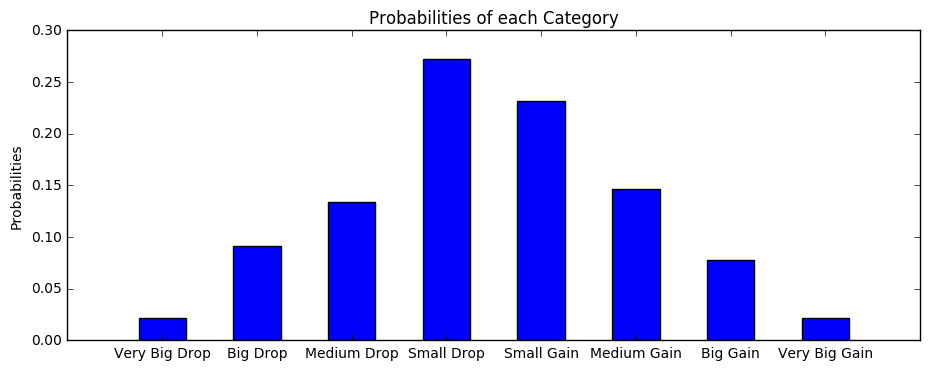

In [24]:
plt.show()

In [25]:
def plot_probability_bar_graph(name, count, two_day_trends, show_baseline=True):
    two_day_probs = []
    all_categories = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']
    for next_day in all_categories:
        two_day_name = name +'_' + next_day
        two_day_count = count_two_day_trends(two_day_trends, two_day_name)
        two_day_prob = two_day_count / count
        two_day_probs.append(two_day_prob)

    plt.figure(figsize=(11,4))
    categories = ('Very Big Drop', 'Big Drop', 'Medium Drop', 'Small Drop', 'Small Gain', 'Medium Gain', 'Big Gain', 'Very Big Gain')
    ind = np.arange(8)
    width = 0.25
    if (show_baseline):
        orig_pl = plt.bar(ind+width, cat_probs, width, color='b', label='Original')
    conditioned_pl = plt.bar(ind, two_day_probs, width, color='r', label='After a ' + name)
    plt.ylabel('Probabilities')
    plt.title('Probabilities of each Category')
    plt.xticks(ind+width, categories)
    plt.legend()
    plt.show()

### Probabilities after a very big drop

In [1]:
plot_probability_bar_graph('vbd', vbd_count, two_day_trends)

NameError: name 'plot_probability_bar_graph' is not defined

### Probabilities after a big drop

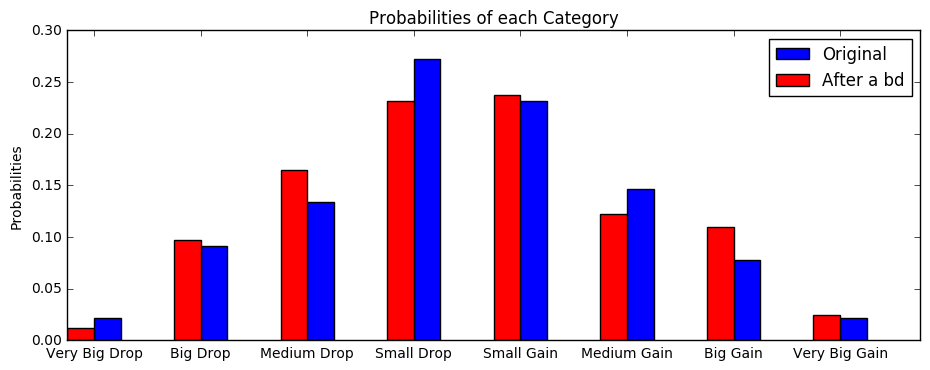

In [27]:
plot_probability_bar_graph('bd', bd_count, two_day_trends)

### Probabilities after a medium drop

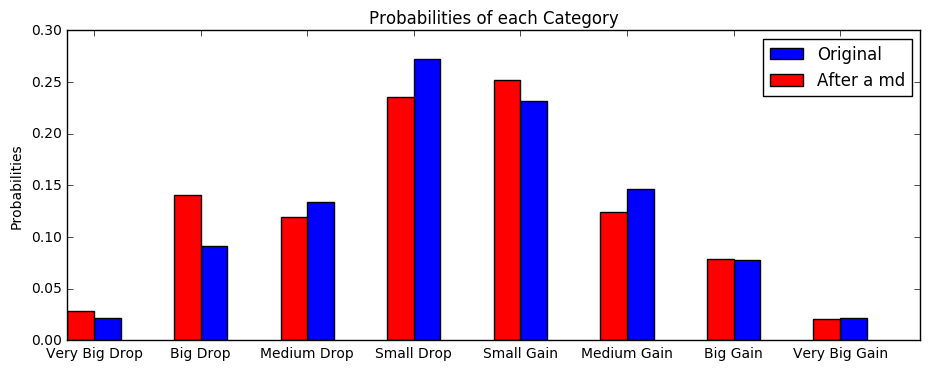

In [28]:
plot_probability_bar_graph('md', md_count, two_day_trends)

### Probabilities after a small drop

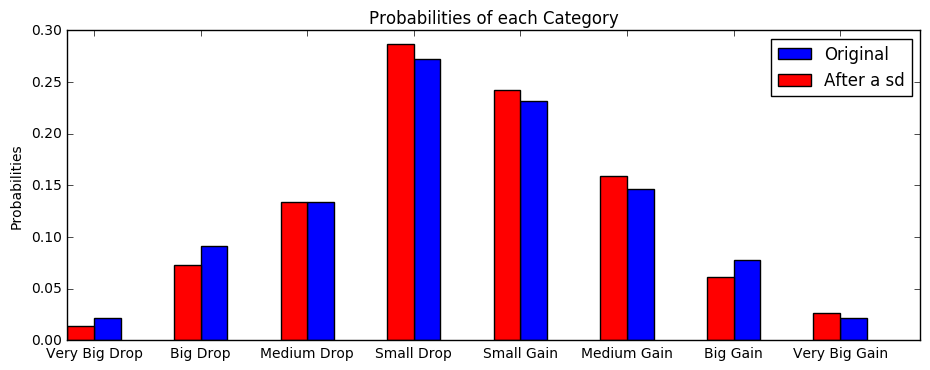

In [29]:
plot_probability_bar_graph('sd', sd_count, two_day_trends)

### Probabilities after a small gain

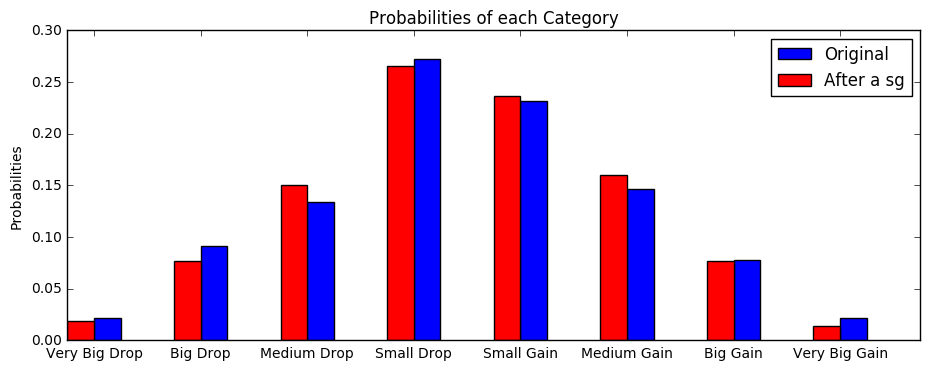

In [31]:
plot_probability_bar_graph('sg', sg_count, two_day_trends)

### Probabilities after a medium gain

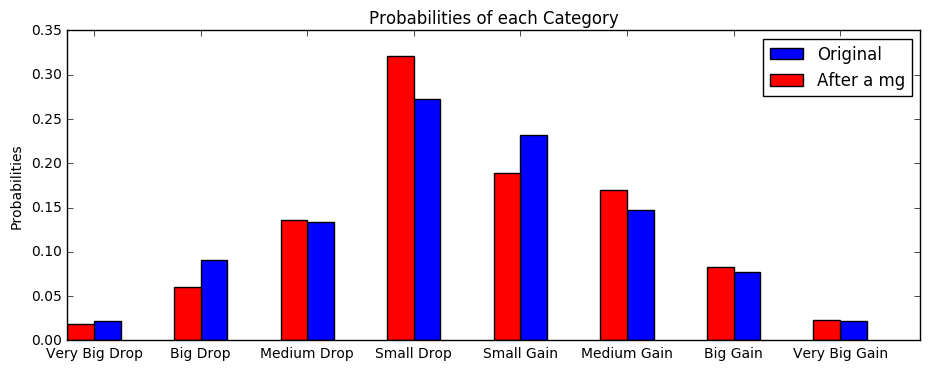

In [32]:
plot_probability_bar_graph('mg', mg_count, two_day_trends)

### Probabilities after a big gain

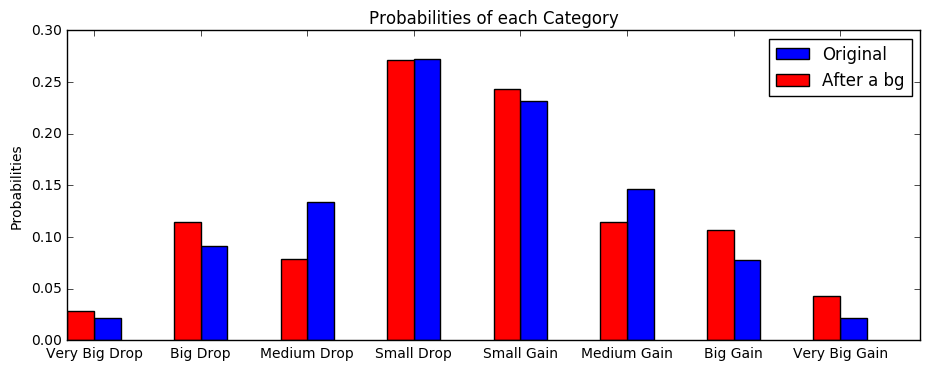

In [33]:
plot_probability_bar_graph('bg', bg_count, two_day_trends)

### Probabilities after a very big gain

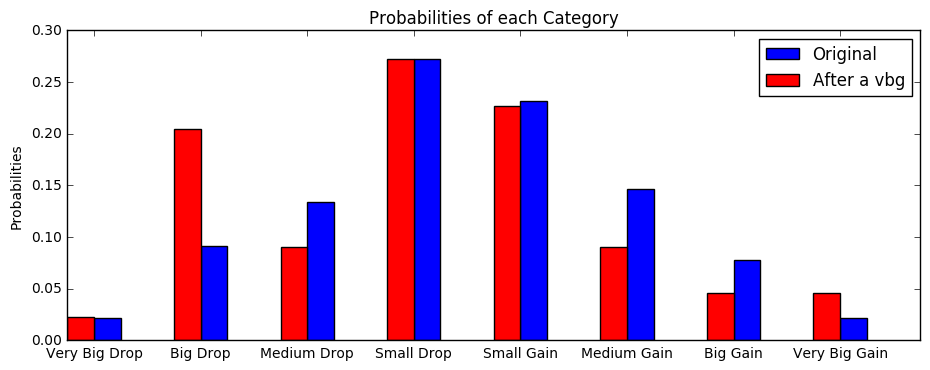

In [34]:
plot_probability_bar_graph('vbg', vbg_count, two_day_trends)

## Let's look at one other stock before we take the average over these stocks

In [35]:
df = pd.DataFrame()
df = df.from_csv('nvda.csv')
daily_movements = get_price_movements(df)

In [36]:
categories = categorize_movements(daily_movements)

In [37]:
vbd_count = count_movement_category(categories, 'vbd')
bd_count = count_movement_category(categories, 'bd')
md_count = count_movement_category(categories, 'md')
sd_count = count_movement_category(categories, 'sd')
sg_count = count_movement_category(categories, 'sg')
mg_count = count_movement_category(categories, 'mg')
bg_count = count_movement_category(categories, 'bg')
vbg_count = count_movement_category(categories, 'vbg')
total_cat_count = len(categories)

In [38]:
p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

In [39]:
cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

In [40]:
cat_probs

[0.024206349206349207,
 0.08055555555555556,
 0.13214285714285715,
 0.26904761904761904,
 0.2619047619047619,
 0.12857142857142856,
 0.07777777777777778,
 0.024206349206349207]

In [43]:
two_day_trends = get_two_day_trends(categories)

In [44]:
two_day_trends[1:10]

['vbd_bg',
 'bg_sd',
 'sd_bg',
 'bg_mg',
 'mg_sd',
 'sd_sg',
 'sg_bd',
 'bd_sg',
 'sg_mg']

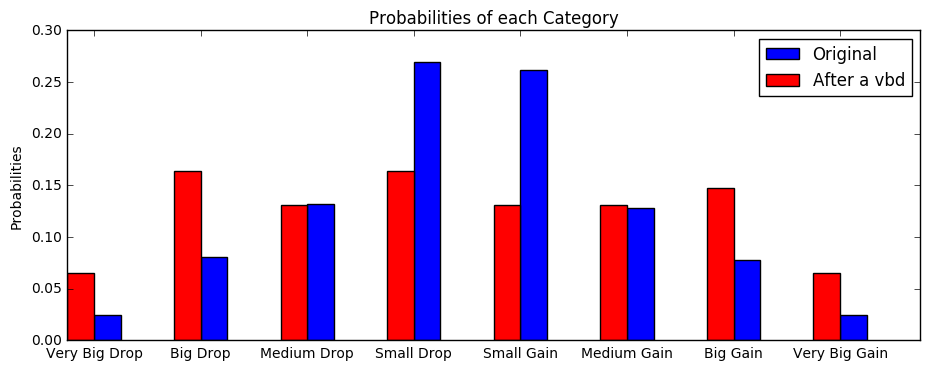

In [45]:
plot_probability_bar_graph('vbd', vbd_count, two_day_trends)

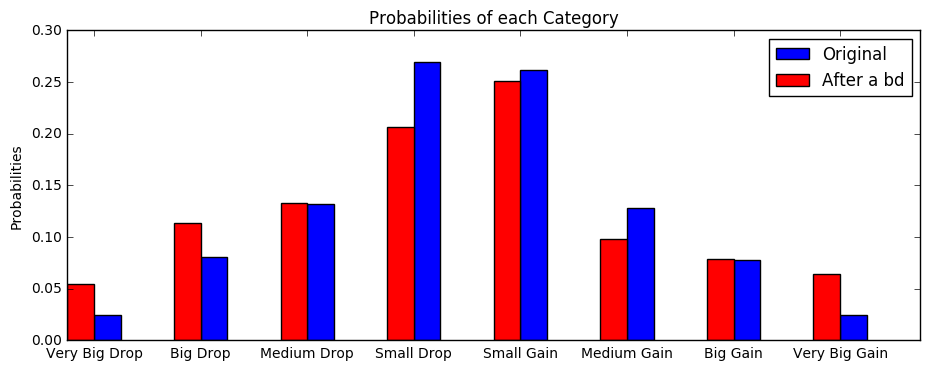

In [46]:
plot_probability_bar_graph('bd', bd_count, two_day_trends)

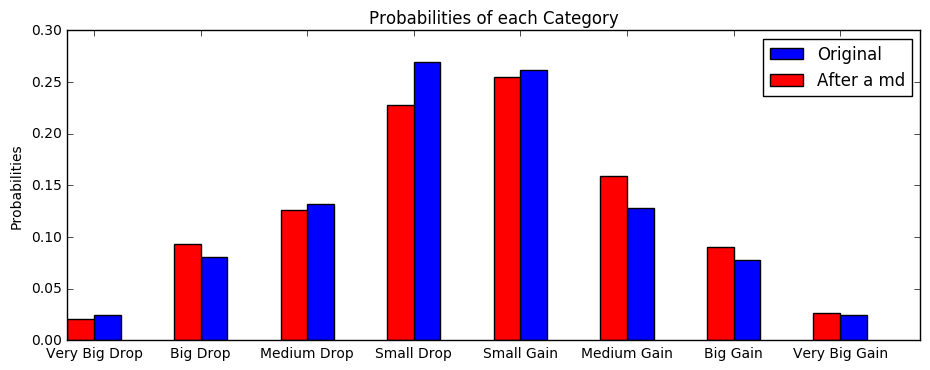

In [48]:
plot_probability_bar_graph('md', md_count, two_day_trends)

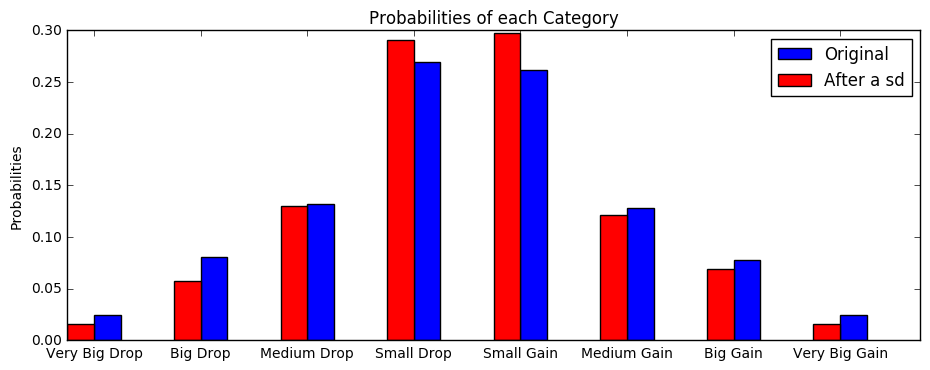

In [49]:
plot_probability_bar_graph('sd', sd_count, two_day_trends)

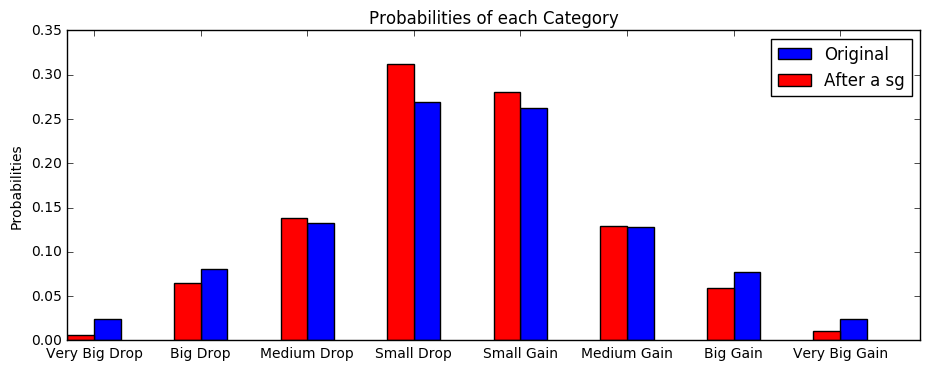

In [50]:
plot_probability_bar_graph('sg', sg_count, two_day_trends)

It looks like small movements are likely to rebound in the other direction with a similar magnitude the next day

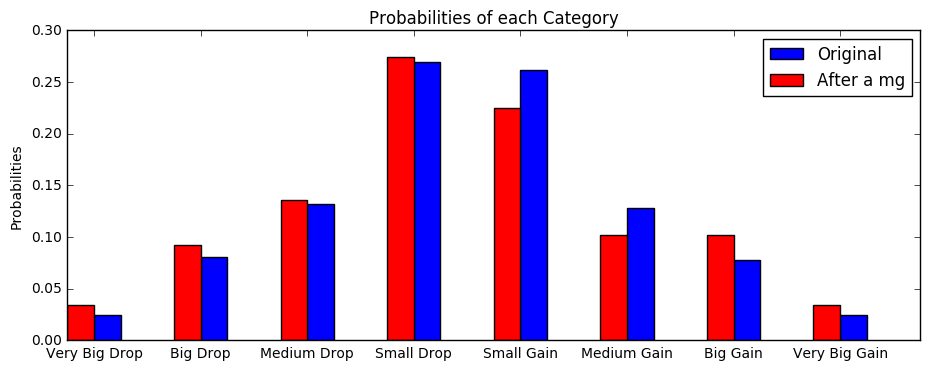

In [51]:
plot_probability_bar_graph('mg', mg_count, two_day_trends)

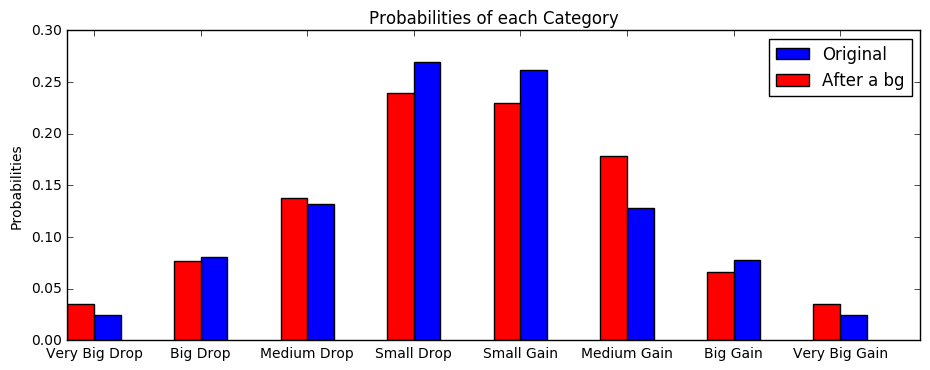

In [52]:
plot_probability_bar_graph('bg', bg_count, two_day_trends)

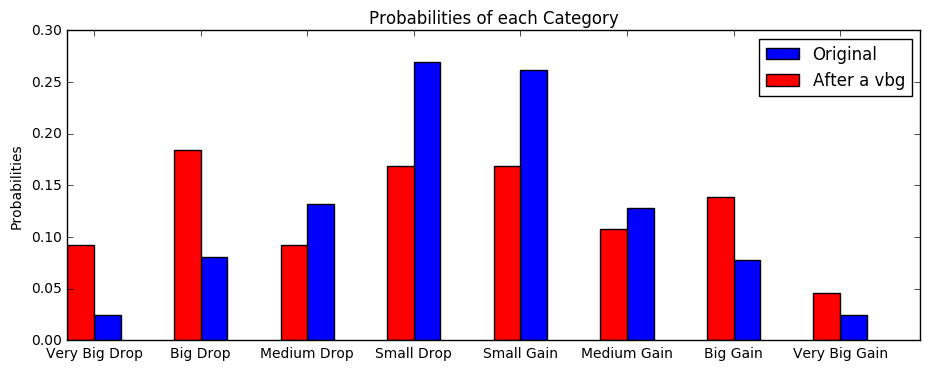

In [53]:
plot_probability_bar_graph('vbg', vbg_count, two_day_trends)

## All stocks

In [55]:
g = glob.glob('*.csv')

all_daily_movements = []
all_categories = []
all_two_day_trends = []

vbd_count = 0
bd_count = 0
md_count = 0
sd_count = 0
sg_count = 0
mg_count = 0
bg_count = 0
vbg_count = 0
total_cat_count = 0

for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    daily_movements = get_price_movements(df)
    categories = categorize_movements(daily_movements)
    
    all_daily_movements.extend(daily_movements)
    all_categories.extend(categories)
    
    vbd_count += count_movement_category(categories, 'vbd')
    bd_count += count_movement_category(categories, 'bd')
    md_count += count_movement_category(categories, 'md')
    sd_count += count_movement_category(categories, 'sd')
    sg_count += count_movement_category(categories, 'sg')
    mg_count += count_movement_category(categories, 'mg')
    bg_count += count_movement_category(categories, 'bg')
    vbg_count += count_movement_category(categories, 'vbg')
    total_cat_count += len(categories)
    
    two_day_trends = get_two_day_trends(categories)
    all_two_day_trends.extend(two_day_trends)

p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

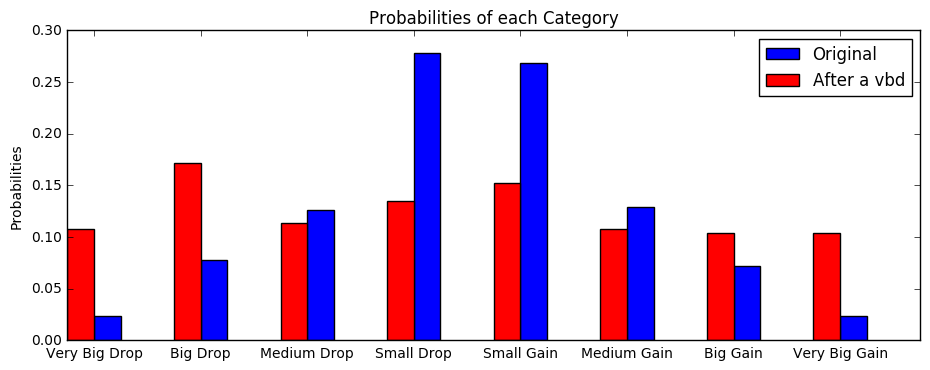

In [56]:
plot_probability_bar_graph('vbd', vbd_count, all_two_day_trends)

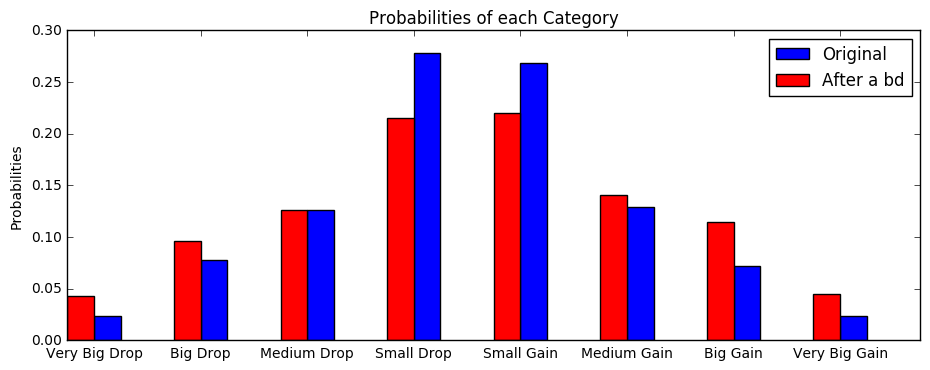

In [57]:
plot_probability_bar_graph('bd', bd_count, all_two_day_trends)

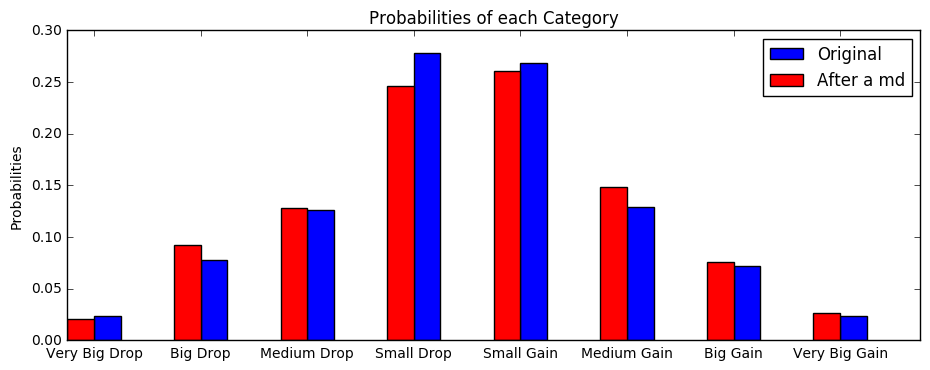

In [60]:
plot_probability_bar_graph('md', md_count, all_two_day_trends)

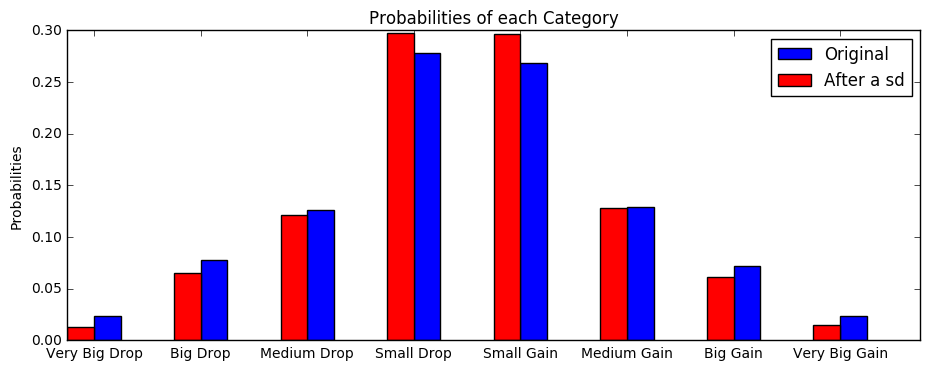

In [61]:
plot_probability_bar_graph('sd', sd_count, all_two_day_trends)

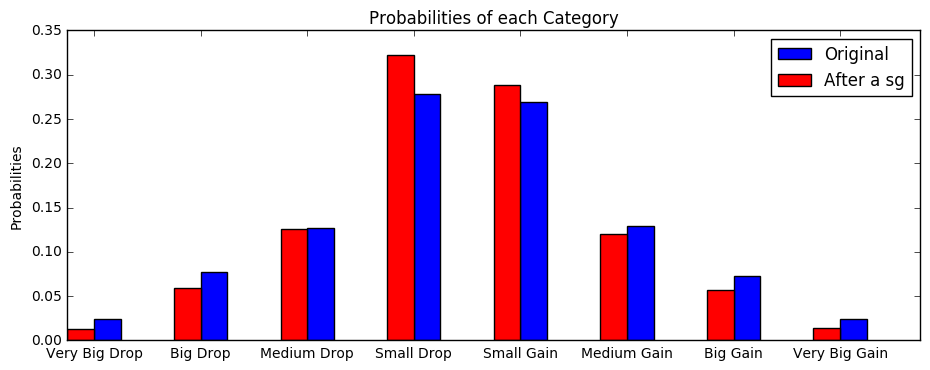

In [63]:
plot_probability_bar_graph('sg', sg_count, all_two_day_trends)

It looks like modest gains make it 5% more likely to be reversed the next day.

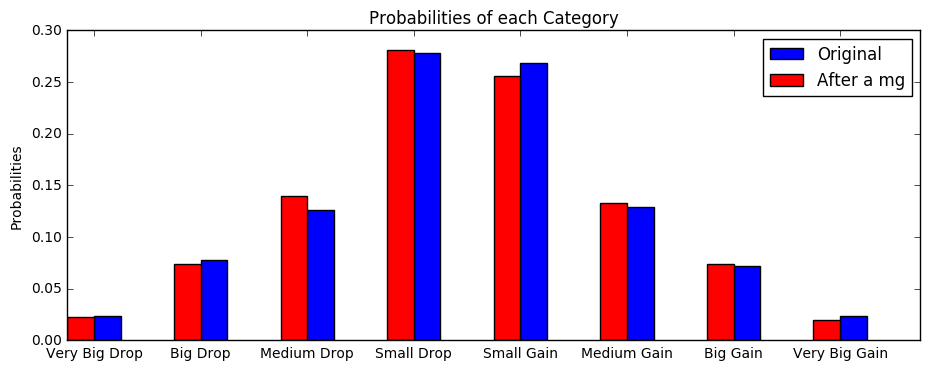

In [64]:
plot_probability_bar_graph('mg', mg_count, all_two_day_trends)

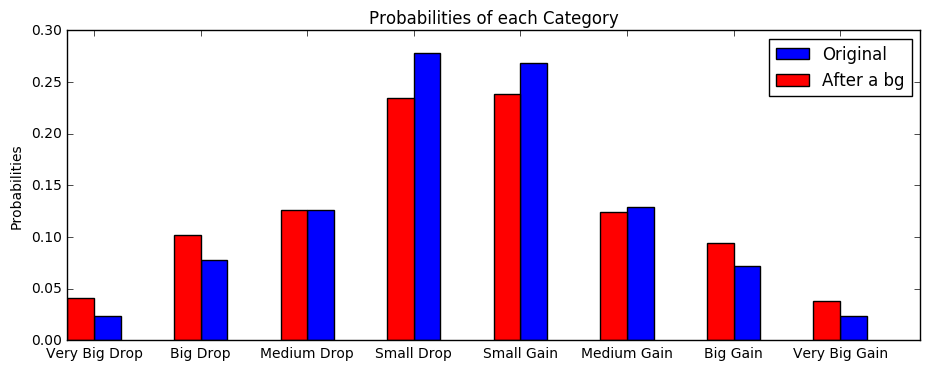

In [65]:
plot_probability_bar_graph('bg', bg_count, all_two_day_trends)

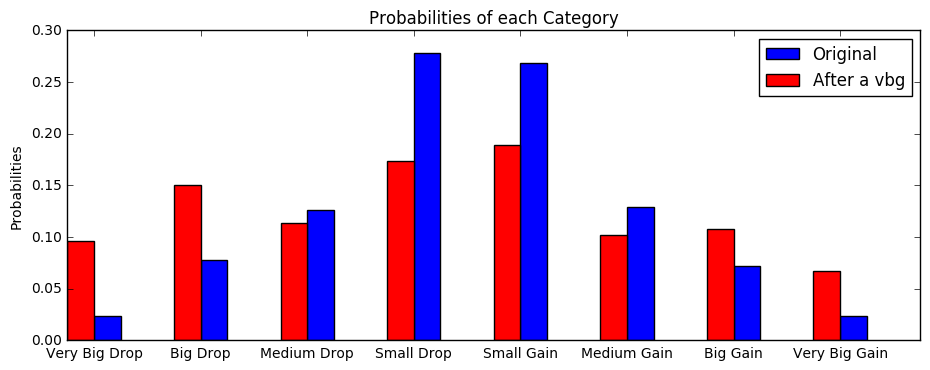

In [66]:
plot_probability_bar_graph('vbg', vbg_count, all_two_day_trends)

In conclusion, it seems that there is a momentum effect present, but there is also a "bounce back" effect as well, where extreme movements tend to raise the probability of an extreme movement in the other direction. 

Also, very large movements in either direction are more likely to result in a loss the next day.